<a href="https://colab.research.google.com/github/AlgorithmBurv/PML/blob/main/PML_10_DelhiClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
data_train = pd.read_csv('/content/DailyDelhiClimateTest.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

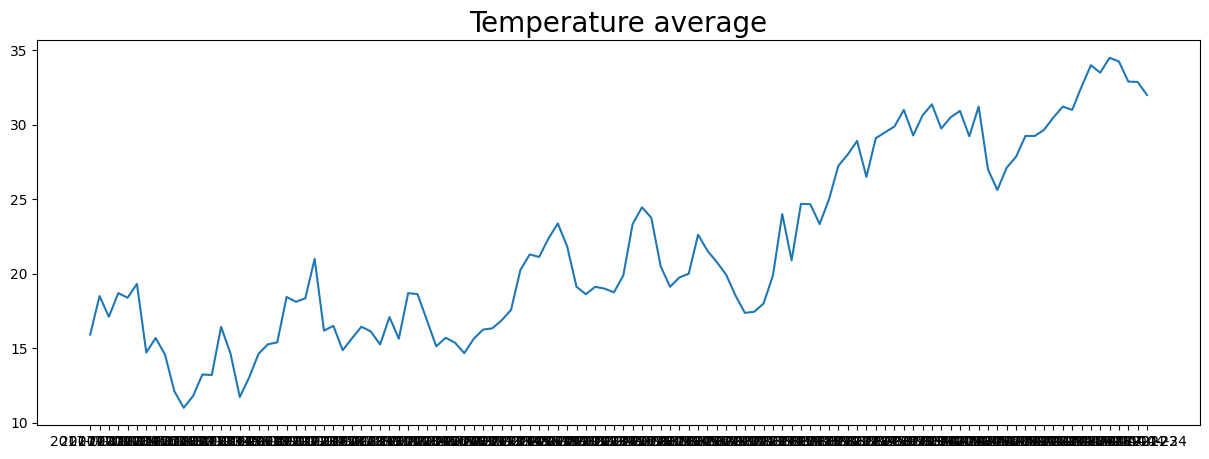

In [5]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values


plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [6]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [7]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [8]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 26.5741 - mae: 27.0741
Epoch 2/100
1/1 [==============================] - 0s 168ms/step - loss: 26.2454 - mae: 26.7454
Epoch 3/100
1/1 [==============================] - 0s 153ms/step - loss: 25.8951 - mae: 26.3951
Epoch 4/100
1/1 [==============================] - 0s 146ms/step - loss: 25.6598 - mae: 26.1598
Epoch 5/100
1/1 [==============================] - 0s 165ms/step - loss: 25.3616 - mae: 25.8616
Epoch 6/100
1/1 [==============================] - 0s 147ms/step - loss: 24.9414 - mae: 25.4414
Epoch 7/100
1/1 [==============================] - 0s 151ms/step - loss: 24.4143 - mae: 24.9143
Epoch 8/100
1/1 [==============================] - 0s 90ms/step - loss: 23.6656 - mae: 24.1656
Epoch 9/100
1/1 [==============================] - 0s 108ms/step - loss: 22.5734 - mae: 23.0734
Epoch 10/100
1/1 [==============================] - 0s 102ms/step - loss: 20.8986 - mae: 21.3986
Epoch 11/100
1/1 [=========================